In [1]:
import pickle
import math
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Used to standardise the data

urand = np.random.rand
nrand = np.random.normal

The function below is used to round to significant figures, since round() only does decimal places :(

In [2]:
def round_sf(num, sig_figs):
    if num != 0:
        return round(num, -int(math.floor(math.log10(abs(num))) - (sig_figs - 1)))
    else:
        return 0  # Can't take the log of 0

## Loading Relevant Features

In [4]:
#Unpickle file 'relev_feats_NO_IMG.pickle', store as list called relev_feats.
#File is then closed again, but relev_feats list is still useable.
filename = 'data/labels_NO_IMG.pickle'
infile = open(filename,'rb')
labels = pickle.load(infile)
print(labels, type(labels), len(labels))
infile.close()
print('\nNumber of relevant features:', len(labels))

['AcquisitionDate', 'AcquisitionTime', 'CalciumScoringMassFactorDevice', 'ContrastBolusStartTime', 'ContrastBolusTotalDose', 'ContrastBolusVolume', 'ContrastFlowDuration', 'ContrastFlowRate', 'ConvolutionKernel', 'DataCollectionCenterPatient', 'DataCollectionCenterPatient', 'DateOfLastCalibration', 'EstimatedDoseSaving', 'Exposure', 'GeneratorPower', 'ImagePositionPatient', 'ImagePositionPatient', 'ImagePositionPatient', 'InstanceNumber', 'KVP', 'LargestImagePixelValue', 'PatientAge', 'PatientSex', 'ProcedureCodeSequence', 'ReconstructionDiameter', 'ReconstructionTargetCenterPatient', 'ReconstructionTargetCenterPatient', 'ReconstructionTargetCenterPatient', 'RequestedProcedureCodeSequence', 'SliceLocation', 'SmallestImagePixelValue', 'TableHeight', 'TimeOfLastCalibration', 'WindowCenter', 'WindowWidth', 'XRayTubeCurrent'] <class 'list'> 36

Number of relevant features: 36


## Loading Data - $X$ matrix of features and values, $Y$ vector of dosages

In [6]:
#Load data.
with open('data/YXnorm_NO_IMG.pickle','rb') as f:  # Python 3: open(..., 'rb')
    Y,X,Yscale,Xscale = pickle.load(f)

#Xdata = np.append(X12,X22,axis=0) #Not called X yet because we need to standardise it.

##Converting X array to float dtype (was recommended by an error when I tried to run the linear regression below).
#Xdata = Xdata.astype(np.float64)

#Standardising Xdata and calling result X.
#scaler = StandardScaler()
#print(scaler.fit(Xdata))
#print('Means\n', scaler.mean_, '\n') #I think this should be used to get the original weights back after unscaling?
#print('Variances\n', scaler.var_)
#X = scaler.transform(Xdata)

#Take a quick look at data.
print('\nX has shape', X.shape)
print('Y has shape', Y.shape)
print('\nFirst row of X\n', X[0])
print('\nY\n', Y)

#Initialise n and p.
n = X.shape[0]
p = X.shape[1]


X has shape (7787, 36)
Y has shape (7787, 1)

First row of X
 [ 0.87569061  0.44847973  0.          0.          0.          0.
  0.          0.          0.          1.          0.60064995  0.
  0.85304598  0.2630597   0.24137931  1.42276423  1.07553957  0.60027855
  0.00689655  0.          1.          0.91304348  0.          0.
  0.73443983  0.02702703  1.          0.60064995  0.         -1.5806846
  0.          0.50205761  0.19907407  0.          0.          0.26397516]

Y
 [[0.18634577]
 [0.17867271]
 [0.18524962]
 ...
 [0.14578816]
 [0.13701895]
 [0.12715358]]


## Split data into test and training sets

In [15]:
proportion = 0.1 #Proportion of rows of X in the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=proportion, random_state=3)
print('Train set is size', len(X_train))
print('Test set is size', len(X_test))

Train set is size 7008
Test set is size 779


## Linear Regression

In [ ]:
lr = LinearRegression()
linear = lr.fit(X_train, Y_train)

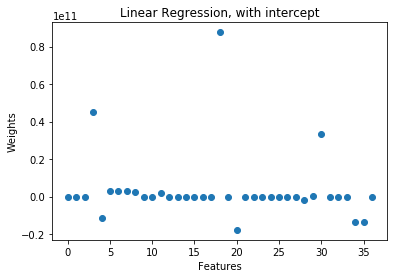

In [21]:
#Plot estimated coefficients from regression. First with the intercept (first point).
all_coefs_linear = [0]*(p+1) #Initialise
all_coefs_linear[0] = linear.intercept_ #This may be stupid, but since ridge_reg.coef_ is a column, I found it easiest to code.
for i in range(p):
    all_coefs_linear[i+1] = linear.coef_[0][i]

plt.figure()
plt.scatter(range(0, p+1), all_coefs_linear)
plt.title('Linear Regression, with intercept')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()

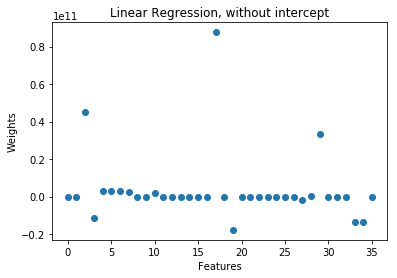

In [24]:
#Plot without intercept (first point in last plot). Since intercept can be large, the plot occasionally looks better.
plt.figure()
plt.scatter(range(0, p), linear.coef_)
title = 'Linear Regression, without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()

In [28]:
print('Train score is\t', lr.score(X_train, Y_train))
print('Test score is\t', lr.score(X_test, Y_test))

#Print indices in order of decreasing weight.
abs_weights = [abs(w) for w in linear.coef_[0]]
dec_weights_linear = list(reversed(np.argsort(abs_weights)))
dec_weights_labels = [labels[i] for i in dec_weights_linear]
print('Indices in order of decreasing weight:', dec_weights_linear)
print('Labels in order of decreasing weight:', dec_weights_labels)

Train score is	 0.9898207476999376
Test score is	 0.9859496333892985
Indices in order of decreasing weight: [17, 2, 29, 19, 34, 33, 3, 5, 6, 4, 7, 10, 27, 28, 23, 35, 13, 31, 24, 8, 9, 15, 16, 26, 25, 14, 20, 1, 30, 12, 21, 18, 11, 22, 32, 0]
Labels in order of decreasing weight: ['ImagePositionPatient', 'CalciumScoringMassFactorDevice', 'SliceLocation', 'KVP', 'WindowWidth', 'WindowCenter', 'ContrastBolusStartTime', 'ContrastBolusVolume', 'ContrastFlowDuration', 'ContrastBolusTotalDose', 'ContrastFlowRate', 'DataCollectionCenterPatient', 'ReconstructionTargetCenterPatient', 'RequestedProcedureCodeSequence', 'ProcedureCodeSequence', 'XRayTubeCurrent', 'Exposure', 'TableHeight', 'ReconstructionDiameter', 'ConvolutionKernel', 'DataCollectionCenterPatient', 'ImagePositionPatient', 'ImagePositionPatient', 'ReconstructionTargetCenterPatient', 'ReconstructionTargetCenterPatient', 'GeneratorPower', 'LargestImagePixelValue', 'AcquisitionTime', 'SmallestImagePixelValue', 'EstimatedDoseSaving', 

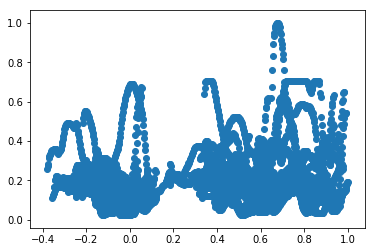

In [40]:
plt.scatter(X[:,17],Y)
plt.show()

## Ridge Regression with manual lambda choice - probably not needed

In [9]:
Lambda = 1 #sklearn calls this alpha.

rr = Ridge(alpha=Lambda)

ridge = rr.fit(X_train, Y_train)

#Plot with intercept (first point).
all_coefs_ridge = [0]*(p+1) #Initialise
all_coefs_ridge[0] = ridge.intercept_ #This looks stupid, but since ridge_reg.coef_ is a column, I found it easiest to code.
for i in range(p):
    all_coefs_ridge[i+1] = ridge.coef_[0][i]

plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_ridge)
title = 'Ridge with $\lambda = $' + str(Lambda) + ', with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

#Plot without intercept (first point in last plot). Since intercept can be large, the plot occasionally looks better.
plt.figure()
plt.scatter(list(range(0, p)), ridge.coef_)
title = 'Ridge with $\lambda = $' + str(Lambda) + ', without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

print('Train score is\t', rr.score(X_train, Y_train))
print('Test score is\t', rr.score(X_test, Y_test))

#Print indices in order of decreasing weight.
abs_weights = [abs(w) for w in ridge.coef_[0]]
dec_weights_ridge = list(reversed(np.argsort(abs_weights)))
print('Indices in order of decreasing weight:', dec_weights_ridge)

Train score is	 0.9894965367374696
Test score is	 0.9888510822515325
Indices in order of decreasing weight: [13, 35, 8, 19, 33, 2, 34, 14, 20, 12, 30, 26, 18, 1, 9, 24, 32, 16, 22, 10, 27, 21, 25, 5, 4, 6, 7, 3, 29, 31, 23, 28, 0, 17, 11, 15]


## Ridge Regression with automatic cross validation from an array of lambdas.

In [10]:
Lambdas = [10**k for k in np.linspace(-5, 5, 100)] #sklearn calls the lambdas alphas.
#I chose these Lambdas because typical lists online are [1e-3, 1e-2, 1e-1, 1].

rr_cv = RidgeCV(alphas=Lambdas, store_cv_values=True)

ridge_cv = rr_cv.fit(X_train, Y_train)

Lambda = ridge_cv.alpha_

#Check that the range of Lambdas is large enough.
if Lambda == max(Lambdas):
    print('WARNING: Optimal lambda is maximum in range, extend Lambdas')
elif Lambda == min(Lambdas):
    print('WARNING: Optimal lambda is minimum in range, extend Lambdas')

#Plot with intercept (first point).
all_coefs_ridge_cv = [0]*(p+1) #Initialise
all_coefs_ridge_cv[0] = ridge_cv.intercept_ #This looks stupid, but since ridge_reg.coef_ is a column, I found it easiest to code.
for i in range(p):
    all_coefs_ridge_cv[i+1] = ridge_cv.coef_[0][i]

plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_ridge_cv)
title = 'Ridge with optimal $\lambda = $' + str(round_sf(Lambda, 3)) + ', with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

#Plot without intercept (first point in last plot). Since intercept can be large, the plot often looks better.
plt.figure()
plt.scatter(list(range(0, p)), ridge_cv.coef_)
title = 'Ridge with optimal $\lambda = $' + str(round_sf(Lambda, 3)) + ', without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

print('Train score is\t', rr_cv.score(X_train, Y_train))
print('Test score is\t', rr_cv.score(X_test, Y_test))

#Print indices in order of decreasing weight.
abs_weights = [abs(w) for w in ridge_cv.coef_[0]]
dec_weights_ridge_cv = list(reversed(np.argsort(abs_weights)))
print('Indices in order of decreasing weight:', dec_weights_ridge_cv)

Train score is	 0.9895423952563465
Test score is	 0.9889602088212551
Indices in order of decreasing weight: [10, 27, 29, 35, 17, 24, 31, 15, 8, 13, 16, 34, 2, 33, 19, 9, 25, 14, 26, 20, 1, 30, 12, 21, 11, 18, 22, 23, 28, 7, 6, 5, 4, 3, 0, 32]


## Lasso with manual lambda choice - probably not needed

In [11]:
Lambda = 0.1 #sklearn calls this alpha.

la = linear_model.Lasso(alpha=Lambda)

lasso = la.fit(X_train, Y_train)

#Plot with intercept (first point).
all_coefs_lasso = [0]*(p+1)
all_coefs_lasso[0] = lasso.intercept_
for i in range(p):
    all_coefs_lasso[i+1] = lasso.coef_[i]
    
plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_lasso)
title = 'Lasso with optimal $\lambda = $' + str(round_sf(Lambda, 3)) + ', with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

#Plot without intercept (first point in last plot). Since intercept can be large, the plot often looks better.
plt.figure()
plt.scatter(list(range(0, p)), lasso.coef_)
title = 'Lasso with $\lambda = $' + str(round_sf(Lambda, 3)) + ', without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

print('Train score is\t', la.score(X_train, Y_train))
print('Test score is\t', la.score(X_test, Y_test))

#Print indices in order of decreasing weight.
abs_weights = [abs(w) for w in lasso.coef_]
dec_weights_lasso = list(reversed(np.argsort(abs_weights)))
print('Indices in order of decreasing weight:', dec_weights_lasso)

Train score is	 0.0
Test score is	 -0.00031888669896473765
Indices in order of decreasing weight: [35, 34, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 16, 17, 18, 27, 33, 32, 31, 30, 29, 28, 26, 19, 25, 24, 23, 22, 21, 20, 0]


## Lasso with automatic cross validation from an array of lambdas.

In [12]:
Lambdas = [10**k for k in np.linspace(-5, 5, 100)] #sklearn calls the lambdas alphas.
#I chose these Lambdas because typical lists online are [1e-3, 1e-2, 1e-1, 1].

la_cv = linear_model.LassoCV(alphas=Lambdas)

lasso_cv = la_cv.fit(X_train, Y_train)

Lambda = lasso_cv.alpha_ #The optimal lambda that the regression finds.

#Check that the range of Lambdas is large enough.
if Lambda == max(Lambdas):
    print('WARNING: Optimal lambda is maximum in range, extend Lambdas')
elif Lambda == min(Lambdas):
    print('WARNING: Optimal lambda is minimum in range, extend Lambdas')

#Plot with intercept (first point).
all_coefs_lasso_cv = [0]*(p+1) #Initialise
all_coefs_lasso_cv[0] = lasso_cv.intercept_ #This looks stupid, but since ridge_reg.coef_ is a column, I found it easiest to code.
for i in range(p):
    all_coefs_lasso_cv[i+1] = lasso_cv.coef_[i]

plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_lasso_cv)
title = 'Lasso with optimal $\lambda = $' + str(round_sf(Lambda, 3)) + ', with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

#Plot without intercept (first point in last plot). Since intercept can be large, the plot often looks better.
plt.figure()
plt.scatter(list(range(0, p)), lasso_cv.coef_)
title = 'Lasso with optimal $\lambda = $' + str(round_sf(Lambda, 3)) + ', without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')

print('Train score is\t', la_cv.score(X_train, Y_train))
print('Test score is\t', la_cv.score(X_test, Y_test))

#Print indices in order of decreasing weight.
abs_weights = [abs(w) for w in lasso_cv.coef_]
dec_weights_lasso_cv = list(reversed(np.argsort(abs_weights)))
print('Indices in order of decreasing weight:', dec_weights_lasso_cv)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Train score is	 0.9895094270539855
Test score is	 0.9888878009353267
Indices in order of decreasing weight: [13, 2, 8, 14, 35, 33, 19, 20, 12, 18, 26, 22, 25, 29, 11, 3, 9, 10, 1, 7, 5, 4, 6, 17, 15, 16, 34, 21, 23, 24, 27, 28, 30, 31, 32, 0]


## Plots of all types together

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


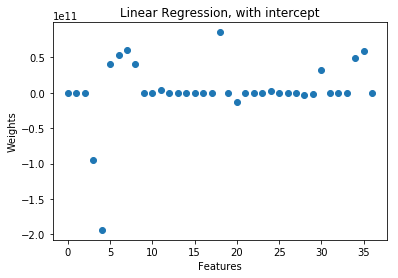

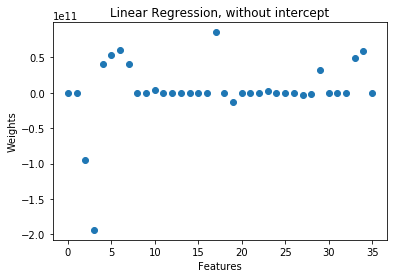

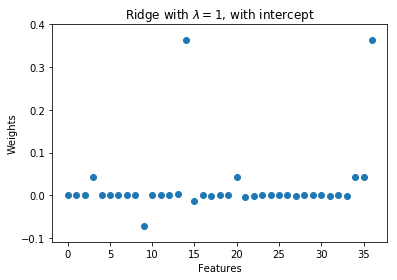

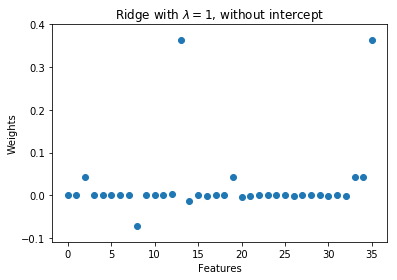

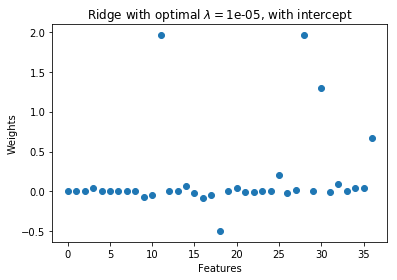

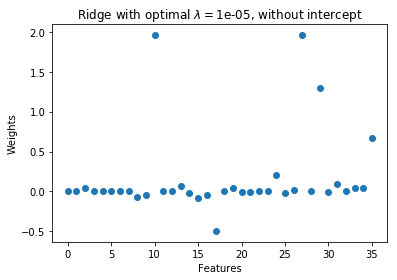

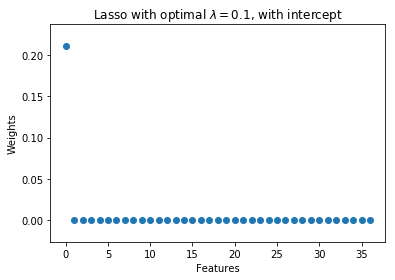

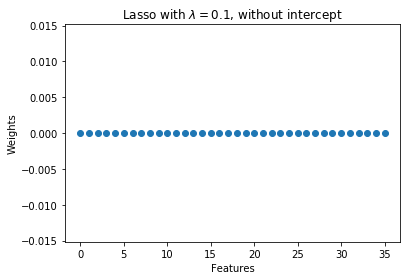

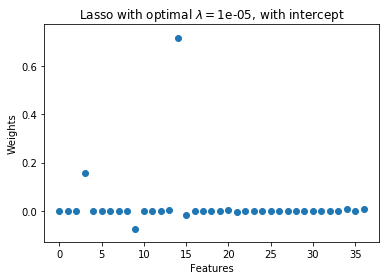

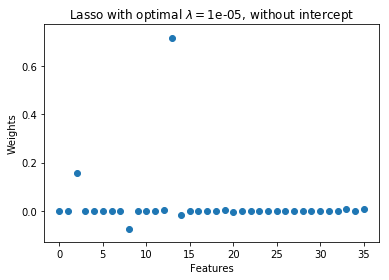

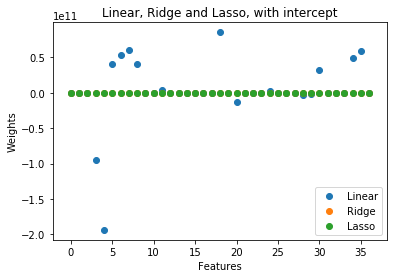

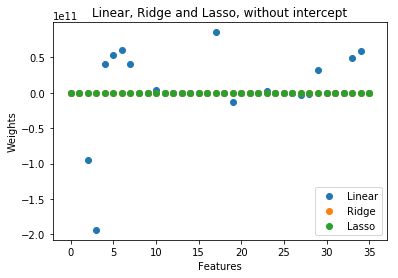

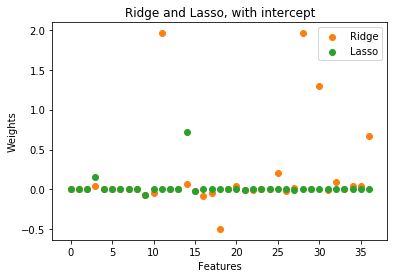

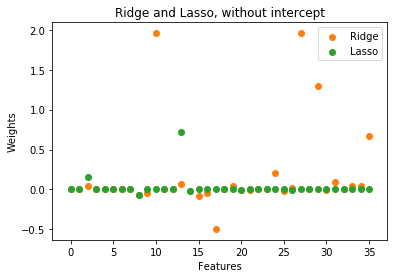

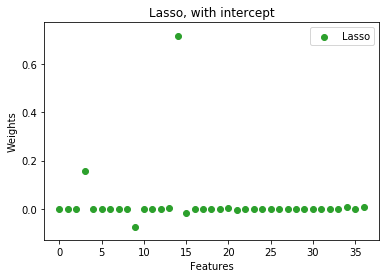

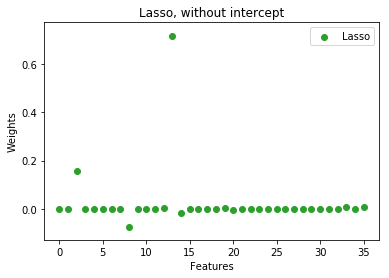

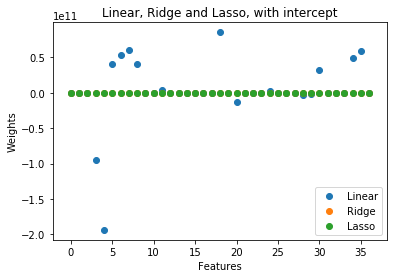

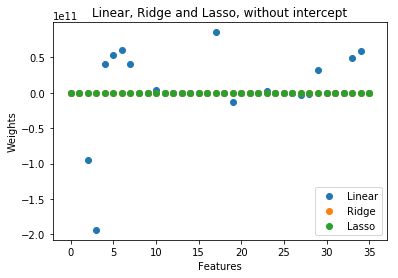

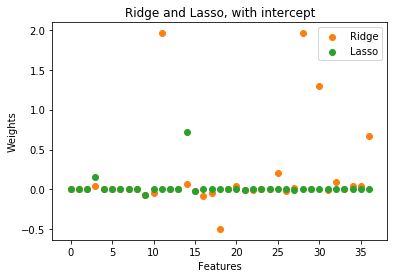

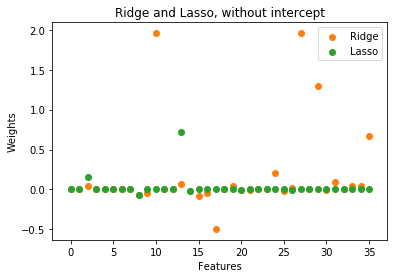

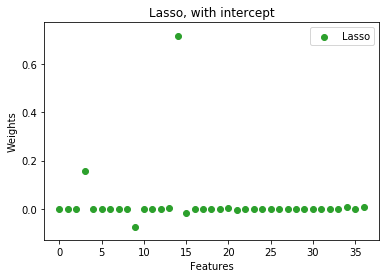

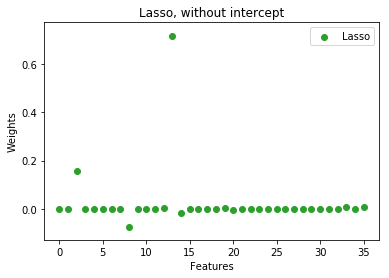

In [14]:
#Plot with intercept and with Linear.
plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_linear, label = 'Linear')
plt.scatter(list(range(0, p+1)), all_coefs_ridge_cv, label = 'Ridge')
plt.scatter(list(range(0, p+1)), all_coefs_lasso_cv, label = 'Lasso')

title = 'Linear, Ridge and Lasso, with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot without intercept and with linear.
plt.figure()
plt.scatter(list(range(0, p)), all_coefs_linear[1:], label = 'Linear')
plt.scatter(list(range(0, p)), all_coefs_ridge_cv[1:], label = 'Ridge')
plt.scatter(list(range(0, p)), all_coefs_lasso_cv[1:], label = 'Lasso')

title = 'Linear, Ridge and Lasso, without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot with intercept and without linear.
plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_ridge_cv, label = 'Ridge', color = 'C1')
plt.scatter(list(range(0, p+1)), all_coefs_lasso_cv, label = 'Lasso', color = 'C2')

title = 'Ridge and Lasso, with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot without intercept and without linear.
plt.figure()
plt.scatter(list(range(0, p)), all_coefs_ridge_cv[1:], label = 'Ridge', color = 'C1')
plt.scatter(list(range(0, p)), all_coefs_lasso_cv[1:], label = 'Lasso', color = 'C2')

title = 'Ridge and Lasso, without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot with intercept, just Lasso.
plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_lasso_cv, label = 'Lasso', color = 'C2')

title = 'Lasso, with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot without intercept, just Lasso.
plt.figure()
plt.scatter(list(range(0, p)), all_coefs_lasso_cv[1:], label = 'Lasso', color = 'C2')

title = 'Lasso, without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()
plt.show()

### All plots together, with scaled coefficients
Here I've scaled up the ridge_cv and lasso_cv coefficients so they're about the same size as the linear coefficients. This allows a more direct comparison. Strangely, they don't seem to be that related!

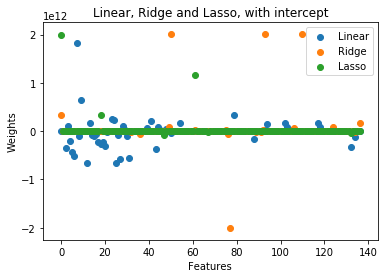

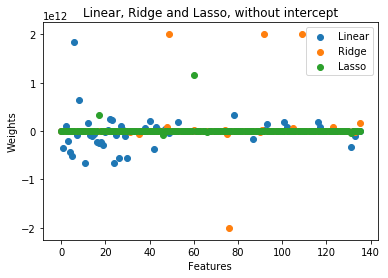

In [113]:
#Scale up coefficients
all_coefs_ridge_cv_scaled = [coef*10**10*5 for coef in all_coefs_ridge_cv]
all_coefs_lasso_cv_scaled = [coef*10**11*3 for coef in all_coefs_lasso_cv]

#Plot with intercept and with Linear.
plt.figure()
plt.scatter(list(range(0, p+1)), all_coefs_linear, label = 'Linear')
plt.scatter(list(range(0, p+1)), all_coefs_ridge_cv_scaled, label = 'Ridge')
plt.scatter(list(range(0, p+1)), all_coefs_lasso_cv_scaled, label = 'Lasso')

title = 'Linear, Ridge and Lasso, with intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

#Plot without intercept and with linear.
plt.figure()
plt.scatter(list(range(0, p)), all_coefs_linear[1:], label = 'Linear')
plt.scatter(list(range(0, p)), all_coefs_ridge_cv_scaled[1:], label = 'Ridge')
plt.scatter(list(range(0, p)), all_coefs_lasso_cv_scaled[1:], label = 'Lasso')

title = 'Linear, Ridge and Lasso, without intercept'
plt.title(title)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.legend()

## All test scores together

In [127]:
#Linear Scores
print('Linear Train Score\t', lr.score(X_train, Y_train))
print('Linear Test Score\t', lr.score(X_test, Y_test))

#Ridge_CV Scores
print('Ridge_CV Train Score\t', rr_cv.score(X_train, Y_train))
print('Ridge_CV Test Score\t', rr_cv.score(X_test, Y_test))

#Lasso_CV Scores
print('Lasso_CV Train Score\t', la_cv.score(X_train, Y_train))
print('Lasso_CV Test Score\t', la_cv.score(X_test, Y_test))

Linear Train Score	 0.9895898746673801
Linear Test Score	 0.989001281011131
Ridge_CV Train Score	 0.9895946195380118
Ridge_CV Test Score	 0.9890041263486233
Lasso_CV Train Score	 0.989502777707401
Lasso_CV Test Score	 0.9888365610306663


## References and Notes

Sklearn:
 - Linear Regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
 - Ridge https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 - Ridge with automatic cross validation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
 - Lasso https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
 - Lasso with automatic cross validation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

Sig figs function copied from here http://code.activestate.com/recipes/578114-round-number-to-specified-number-of-significant-di/

Explanation of why you still need to divide the data into train and test sets even when using cross validation: https://scikit-learn.org/stable/modules/cross_validation.html Here are some quotes:
 - When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the _test set_ because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.
 - A solution to this problem is a procedure called cross-validation (CV for short). __A test set should still be held out for final evaluation.__
 - As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to Leave-One-Out cross validation.

I don't how exactly the inbuilt cross-validation works in RidgeCV and LassoCV. Perhaps this would be worth exploring.

## To Do / Things to Remember

 - Extract names of features in decreasing order of weight.
 - Add explanations at beginning: Explain what to conclude if there is a large discrepancy between train score and test score.
 - Sort out convergence Warning in automatic Lasso.
 - The dose is slice dependent, so each row of X corresponds to an individual slice.
 - Need to deal with outliers somehow, since MSE will exaggerate their effect.
 - Does it make sense to do the analysis on the coninuous and binary data all in one go? Perhaps they should be separated.
 - Why are the weights such vastly different magnitudes?! Without scaling this problem didn't occur.
 - Should we try non-linear regression?
 - The best test score is 1.